In [1]:
import pandas as pd
import numpy as np




In [2]:
df = pd.read_csv('cov2vect.csv', header = None)
X = df
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,4.380573,-3.762141,-4.292756,7.175021,-0.381252,0.976608,-11.767803,-0.974412,6.000600,4.144257,...,-2.370787,8.558210,13.280169,-3.033208,-9.818228,-2.494200,-5.174267,-7.776530,-12.377538,-3.860251
1,1.615402,-1.541404,-4.348377,6.987983,0.299455,1.230945,-10.948531,-1.373381,5.657287,2.931703,...,-1.994228,9.442633,10.524706,0.331448,-6.053142,-4.214556,-4.721151,-3.716502,-10.301792,-2.658725
2,2.932339,-7.716344,-3.182016,7.748101,-0.264600,-6.312595,-12.179543,3.003592,6.034258,-0.045739,...,1.003647,19.094015,4.134118,-3.085243,-12.679811,-11.601875,-12.829510,-5.927757,-16.574290,-1.992269
3,5.131956,-6.563405,-4.055224,11.589682,-0.478878,0.014867,-14.216432,2.010095,6.770205,2.611487,...,-0.821905,15.553152,11.399011,-2.848635,-13.176079,-4.725287,-7.367418,-4.595629,-13.327709,-1.551819
4,6.800557,-11.533808,-4.012169,8.921095,-0.420214,1.243108,-13.871548,1.394891,4.261621,2.827230,...,-0.684297,18.718319,10.337213,-4.931649,-15.422070,-7.565075,-13.145890,-6.969938,-14.078060,-1.784664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.441916,-4.973157,-4.733602,9.860046,2.756126,-2.121817,-21.537058,-2.996042,20.696896,2.084675,...,-0.025214,15.707182,15.725436,4.154243,-14.739864,-7.011128,-3.258594,-12.077540,-18.537350,-2.052970
96,3.544500,-5.088700,-3.315926,5.468853,0.521531,-0.821191,-12.729947,2.851914,5.488653,5.070152,...,-0.503847,12.866527,10.566926,-1.296119,-13.432643,-2.631300,-7.870134,-4.082045,-11.629880,-2.839345
97,-0.657536,-6.038743,-4.080045,1.496104,-2.566030,-9.290892,-12.894241,5.227246,1.706130,-1.796737,...,0.597375,18.570280,1.054108,-1.362014,-12.475961,-11.631438,-14.153132,-1.452089,-12.894324,3.297095
98,0.438703,-2.610365,0.897654,0.796714,2.445454,0.709119,-4.709922,-0.176891,1.258019,-1.755155,...,0.857213,3.944325,2.380118,0.498039,-4.583952,0.036167,-1.158296,-4.024033,-4.054891,-2.484290


In [3]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model1 = model1.fit(df)


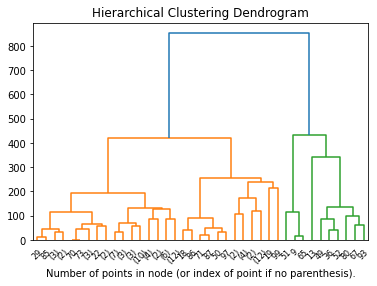

In [4]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [5]:
# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=150, n_clusters=None)

model1 = model1.fit(df)

In [6]:
labels = model1.labels_.tolist()
nocluster = set(labels)
totalcluster = len(nocluster)
totalcluster

10

In [7]:
cluster_dict = {}

i = 0
for i in range(len(labels)):
    if labels[i] not in cluster_dict.keys():
         cluster_dict[labels[i]] = [i]
    else:
          cluster_dict[labels[i]].append(i)
    i+=1

In [8]:
for i in range(totalcluster):
    print(len(cluster_dict[i]))

6
14
47
15
6
6
3
1
1
1


In [9]:
outlier_cluster = []
for i in range(totalcluster):
    if len(cluster_dict[i]) == 1:
        outlier_cluster.append(i)
    
print(outlier_cluster)

[7, 8, 9]


In [10]:
cluster_dict[outlier_cluster[0]]

[19]

In [11]:
X.iloc[cluster_dict[outlier_cluster[0]]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
19,10.360203,-5.154559,-13.450405,12.824697,6.553541,7.652467,-33.689976,6.353319,21.949818,18.320559,...,-3.240406,26.223087,30.0981,-3.765019,-21.085533,-7.701087,-25.944626,-2.969079,-27.694382,-4.474064


In [12]:
X.iloc[cluster_dict[0]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
36,-2.842821,-7.283148,-8.195484,-3.361817,-0.170180,-14.048708,-20.615744,5.386586,4.971811,-9.965291,...,-8.207074,22.317694,10.801508,-1.180091,-24.374506,-22.304781,-16.400099,-14.952602,-23.439632,6.850525
49,-1.510650,-11.853647,-7.792691,-0.410092,1.146943,-13.605926,-15.206273,6.973811,-5.818600,-3.256252,...,-3.170748,23.321602,1.748697,-0.668680,-22.904808,-21.359655,-21.082687,-4.592968,-19.096619,1.815147
52,-3.133712,-9.604454,-5.200057,-2.700806,-3.944968,-13.415811,-18.491312,5.365893,2.323647,-10.838997,...,-7.698863,22.366323,4.479616,-4.316914,-21.128296,-21.875727,-18.296686,-13.043437,-20.476442,5.980033
67,2.846437,-16.234081,-12.217618,7.563805,0.290252,-20.288746,-22.412457,7.080382,4.257922,-9.163875,...,-2.827033,35.477215,3.276667,-6.103508,-32.770428,-31.553724,-25.469190,-9.113732,-34.077553,3.121256
80,3.039348,-18.442986,-14.053578,2.643454,-3.575144,-23.987926,-21.624962,7.949693,-3.601803,-7.911142,...,-5.174691,37.570328,2.690826,-4.951643,-34.910930,-33.956635,-28.261133,-9.394019,-33.380775,3.589008
93,1.085337,-11.033558,-7.929191,0.874161,-1.540242,-19.029455,-15.999878,5.124501,1.767690,-8.618482,...,-4.806884,31.166088,3.330698,-2.057195,-28.552628,-29.585005,-23.463331,-7.762007,-32.242500,6.155550


In [13]:
cluster_mediod = np.zeros((totalcluster, X.iloc[1].size))
cluster_mediod.shape

(10, 300)

In [14]:
X.iloc[cluster_dict[9]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
13,2.088764,-44.69806,-30.14236,11.312444,-7.126286,-24.78826,-37.87297,-14.999754,-14.854925,-17.059668,...,-10.313982,56.320908,5.473192,-13.084594,-34.728157,-49.79122,-43.26285,-26.155865,-57.290897,12.116572


In [15]:
from sklearn_extra.cluster import KMedoids
cluster_mediod = []

GetMedoid = lambda vX: KMedoids(n_clusters=1).fit(vX).cluster_centers_
for i in range(totalcluster):
    cluster_mediod.append(GetMedoid(X.iloc[cluster_dict[i]])[0])


In [16]:
from scipy.spatial import distance
cluster_mediod[1]
distance.cosine(cluster_mediod[0],cluster_mediod[2])
# distance.cosine(cluster_mid[0], cluster_mid[1])

0.27896537491585005

In [17]:
X.iloc[1].shape

(300,)

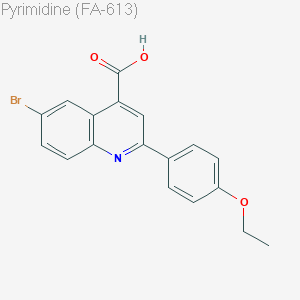

In [18]:
from scipy.spatial import distance
from PIL import Image
import glob
image_list = []
images_name = []
for filename in glob.glob('images/*.png'): #assuming gif
    im=Image.open(filename)
    images_name.append(filename.split("/")[1])
    image_list.append(im)

image_list[1]   

In [19]:
from scipy.spatial import distance
from PIL import Image
import glob
image_list = []
for filename in glob.glob('images/*.png'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
for i in range(10):
    for j in range(10):
        dis = distance.cosine(cluster_mediod[i],cluster_mediod[j])
        print(dis)
    print('')    
    

0
0.2874134949718493
0.27896537491585005
0.31160649309816324
0.18006838795708002
0.09322043976072125
0.15860638321584308
0.3208553923448223
0.3408002450199107
0.12391527801698754

0.2874134949718493
0
0.0350583620733812
0.1338034867823633
0.08416360251623523
0.290761369402909
0.26293968602482
0.09303686925033117
0.2891832453307366
0.3584794587022446

0.27896537491585005
0.0350583620733812
0
0.15357317828983208
0.09100992240370676
0.2868712804608812
0.24132571715973494
0.11088522664275002
0.2636400598435167
0.36816085916385843

0.31160649309816324
0.1338034867823633
0.15357317828983208
0
0.13579634391573492
0.3267418267511142
0.22563150383149533
0.1523533413132736
0.21666755036217988
0.3920739739823218

0.18006838795708002
0.08416360251623523
0.09100992240370676
0.13579634391573492
0
0.2171468025056944
0.15196215764321264
0.1193475064124282
0.16057840993076866
0.23866486072930637

0.09322043976072125
0.290761369402909
0.2868712804608812
0.3267418267511142
0.2171468025056944
0
0.26113994

In [20]:
# outlier need to change here for differnet experiment

from scipy.spatial import distance
outlier_cluster = outlier_cluster[2]
cluster_distance = []
for i in range(totalcluster):
    if i == outlier_cluster:
        continue
    cluster_distance.append((distance.euclidean(cluster_mediod[outlier_cluster], cluster_mediod[i]),outlier_cluster, i))
print('Euclidian distancce, Outlire, Other cluster')
cluster_distance

Euclidian distancce, Outlire, Other cluster


[(259.36579453735584, 9, 0),
 (374.814346404941, 9, 1),
 (396.980165474639, 9, 2),
 (419.53114450124144, 9, 3),
 (347.4301654294664, 9, 4),
 (360.2892694364936, 9, 5),
 (317.5795534850043, 9, 6),
 (348.67858167993404, 9, 7),
 (354.094607408319, 9, 8)]

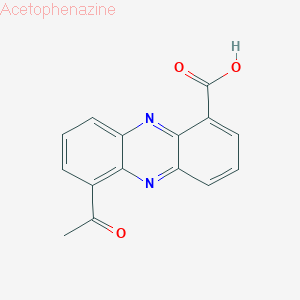

In [21]:
image_list[8]
image_list[cluster_dict[1][0]]

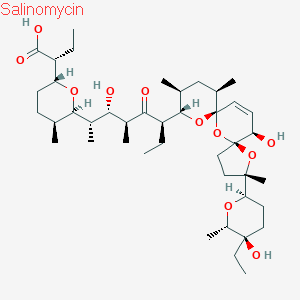

In [22]:
image_list[8]


In [23]:
cluster_distance.sort(key=lambda y: y[0])
cluster_distance = cluster_distance[:5]
print('Euclidian distance, Outlire, Other cluster')
cluster_distance

Euclidian distance, Outlire, Other cluster


[(259.36579453735584, 9, 0),
 (317.5795534850043, 9, 6),
 (347.4301654294664, 9, 4),
 (348.67858167993404, 9, 7),
 (354.094607408319, 9, 8)]

In [24]:
  def findCandidateClusters(k_nearest_cluster):
    closestCluster = k_nearest_cluster[0][2]
    closestDistance = k_nearest_cluster[0][0]
    candidateCluster = []
    rejectedCluster = []
    dist = distance.euclidean(cluster_mediod[closestCluster],cluster_mediod[k_nearest_cluster[0][1]])
#     print(dist)
    candidateCluster.append(k_nearest_cluster[0])
    for i in k_nearest_cluster:
        if i in rejectedCluster:
            print('rejected')
            print(rejectedCluster)
            continue
        for j in k_nearest_cluster:
            if j == i: continue
            dist_btwn = distance.euclidean(cluster_mediod[i[2]],cluster_mediod[j[2]])
            origin = cluster_mediod[i[2]] + (- cluster_mediod[i[2]])
            translate_outlier = cluster_mediod[i[1]] + (- cluster_mediod[i[2]])
            translate_cluster = cluster_mediod[j[2]] + (- cluster_mediod[i[2]])
            cos_dist = distance.cosine(translate_outlier, translate_cluster)
            print(dist_btwn)
            print(cos_dist)
            print(j)
            print('')
            if cos_dist < 1  :
                if j in candidateCluster:
                    continue
                candidateCluster.append(j)
            else:
                if j not in rejectedCluster:
                    rejectedCluster.append(j)
                if j in candidateCluster:
                    print(j)
                    print('is included') 
                    candidateCluster.remove(j)   
                    
        for i in candidateCluster:
            if i in rejectedCluster:
                candidateCluster.remove(i)

    return  candidateCluster   

In [25]:
neighborCluster = findCandidateClusters(cluster_distance)
neighborCluster

215.9534108561413
0.8835073912090206
(317.5795534850043, 9, 6)

149.95062193352882
1.3979207286258095
(347.4301654294664, 9, 4)

215.71110631570255
1.069482779513999
(348.67858167993404, 9, 7)

201.73361627199054
1.1664276739353134
(354.094607408319, 9, 8)

215.9534108561413
0.41514114878900754
(259.36579453735584, 9, 0)

264.8064076393751
0.7011104660507845
(347.4301654294664, 9, 4)

265.334924059979
0.7051998290101338
(348.67858167993404, 9, 7)

236.39678430116606
0.7911600989669666
(354.094607408319, 9, 8)

rejected
[(347.4301654294664, 9, 4), (348.67858167993404, 9, 7), (354.094607408319, 9, 8)]
rejected
[(347.4301654294664, 9, 4), (348.67858167993404, 9, 7), (354.094607408319, 9, 8)]
rejected
[(347.4301654294664, 9, 4), (348.67858167993404, 9, 7), (354.094607408319, 9, 8)]


[(259.36579453735584, 9, 0),
 (317.5795534850043, 9, 6),
 (348.67858167993404, 9, 7)]

In [26]:
print('Euclidean distance, Outlier, Other cluster')
neighborCluster

Euclidean distance, Outlier, Other cluster


[(259.36579453735584, 9, 0),
 (317.5795534850043, 9, 6),
 (348.67858167993404, 9, 7)]

In [27]:
import os
from PIL import Image
j = neighborCluster[0][1]
os.makedirs(os.path.join("Cluster-images-mediod","outlier-cluster-{}".format(j)))
for k in range(len(cluster_dict[j])):
        l = cluster_dict[j][k]
        image_list[l].save(r'Cluster-images-mediod/outlier-cluster-%d/%s' % (j,images_name[l]))

for i in range(len(neighborCluster)):
    j = neighborCluster[i][2]
    os.makedirs(os.path.join("Cluster-images-mediod","cluster-{}".format(j)))

    for k in range(len(cluster_dict[j])):
        l = cluster_dict[j][k]
        image_list[l].save(r'Cluster-images-mediod/cluster-%d/%s' % (j,images_name[l]))

In [28]:
  def findCandidateClusters(k_nearest_cluster):
    closestCluster = k_nearest_cluster[0][2]
    closestDistance = k_nearest_cluster[0][0]
    candidateCluster = []
    candidateCluster.append(k_nearest_cluster[0])
    for j in k_nearest_cluster:
        #if j == 0: continue
        dist = distance.euclidean(cluster_mediod[closestCluster],cluster_mediod[j[2]])
        cos_dist = distance.cosine(cluster_mediod[closestCluster],cluster_mediod[j[2]])
        print(dist)
        if cos_dist >= 1 :
            candidateCluster.append(j)
    return  candidateCluster   

In [29]:
neighborCluster = findCandidateClusters(cluster_distance)
neighborCluster

0.0
215.9534108561413
149.95062193352882
215.71110631570255
201.73361627199054


[(259.36579453735584, 9, 0)]

In [30]:
k_nearest_cluster = list(zip(*cluster_distance[:5]))[2]
k_nearest_cluster

(0, 6, 4, 7, 8)

In [31]:
def findNearestObjectOfClusters(k_nearest_cluster):
    distance_all_cluster = []
    nearestObjects = []
    object_distance = []
    for j in range(len(k_nearest_cluster)):
        for i in range(len(cluster_dict[k_nearest_cluster[j]])):
            object_distance.append((distance.euclidean(cluster_mediod[outlier_cluster[0]], X.iloc[cluster_dict[k_nearest_cluster[j]][i]]),outlier_cluster[0], k_nearest_cluster[j],  cluster_dict[k_nearest_cluster[j]][i]))
        #distance_all_cluster.append(object_distance)
        nearestObjects.append(min(object_distance, key=lambda tup: tup[0]))
        object_distance = []
    return  nearestObjects   

In [32]:
nearestObjects = findNearestObjectOfClusters(k_nearest_cluster)
nearestObjects.sort(key=lambda y: y[0])
nearestObjects

TypeError: 'int' object is not subscriptable

In [ ]:
from scipy.spatial import distance
for i in range(100):
    for j in range(100):
        print(distance.cosine(X[i], X[j]))
    print('new loop')    

In [ ]:
def findCandidateObjectOfClusters(k_nearest_objects):
    closestObject = k_nearest_objects[0][3]
    closestDistance = k_nearest_objects[0][0]
    candidateObjects = []
    candidateObjects.append(k_nearest_objects[0])
    for j in range(len(k_nearest_objects)):
        #if j == 0: continue
        dist = distance.euclidean(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        cos_dist = distance.cosine(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        print(dist)
        if cos_dist >= .6 and dist  >=  closestDistance*.8 :
            candidateObjects.append(k_nearest_objects[j])
    return  candidateObjects   

In [ ]:
neighborObjects = findCandidateObjectOfClusters(nearestObjects)
neighborObjects